In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

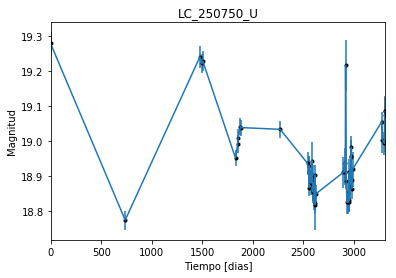

In [2]:
data = np.genfromtxt('LC_250750_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_250750_U')
plt.savefig("LC_250750_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

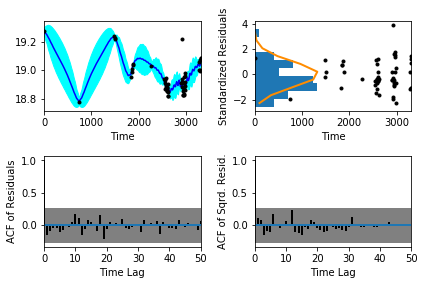

In [5]:
sample.assess_fit()

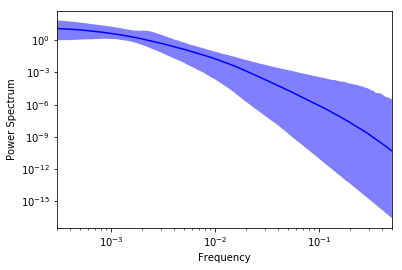

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

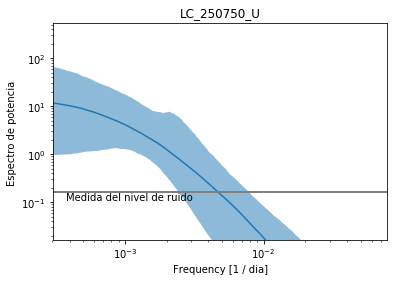

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_250750_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_250750_U')

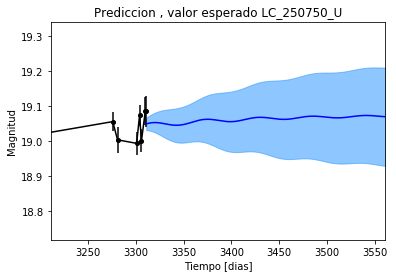

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_250750_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_250750_U')

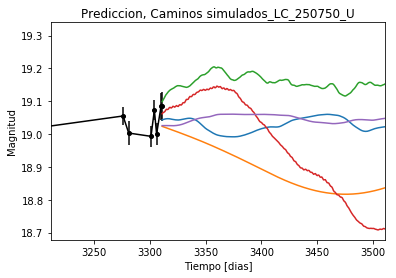

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_250750_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


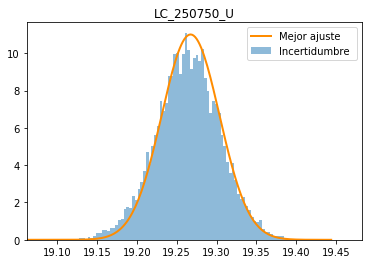

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_250750_U')
plt.savefig("Mejor_ajuste_LC_250750_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_250750_U')

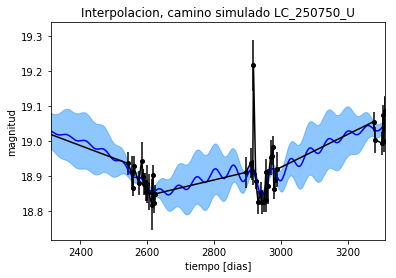

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_250750_U')

Text(0.5,1,'Interpolacion, camino simulado LC_250750_U')

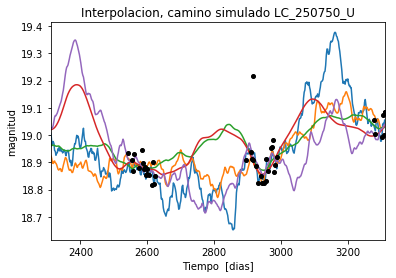

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_250750_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 556.979257026
Median: 0.019038625838
Standard deviation: 0.210665931118
68% credibility interval: [ 0.00121556  0.2701149 ]
95% credibility interval: [  3.54849001e-04   8.06253859e-01]
99% credibility interval: [  3.16283955e-04   9.62722160e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 381.950916539
Median: 0.00340744318468
Standard deviation: 0.10595933471
68% credibility interval: [ 0.00055684  0.04494001]
95% credibility interval: [  3.39370919e-04   3.86561330e-01]
99% credibility interval: [  3.12710543e-04   7.25704765e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 495.721457699
Median: 0.0228894242558
St

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2006.13635084
Median: 95.3666599217
Standard deviation: 1.67223883168
68% credibility interval: [ 93.49125729  96.62736916]
95% credibility interval: [ 90.93674678  97.25602523]
99% credibility interval: [ 88.85700322  97.67959196]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 599.021360919
Median: 0.759410813957
Standard deviation: 2.29321681098
68% credibility interval: [ 0.08141514  4.0461471 ]
95% credibility interval: [ 0.01615089  7.93071038]
99% credibility interval: [  1.00875546e-02   1.11605617e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 567.510438774
Median: 0.936754908439
Standard deviation: 9.32364006306
68% credibility interval: [  0.02841811  11.11919978]
95% credibility interval: [  2

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 3.08710390419e-59
Standard deviation: 7.89534533169e+88
68% credibility interval: [  2.64158468e-125   1.80473418e-016]
95% credibility interval: [  5.83600379e-256   4.16005444e+051]
99% credibility interval: [  6.61440241e-307   2.98368966e+063]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3652.21853511
Median: 19.0267358289
Standard deviation: 0.0829460839909
68% credibility interval: [ 18.96295234  19.10215665]
95% credibility interval: [ 18.8800058   19.20898832]
99% credibility interval: [ 18.79878353  19.30934754]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 400.252729083
Median: 0.0135863929711
Standard deviation: 0.253251330457
68% credibility interval: [ 0.         0.4285319]
95% credibility interval: [ 0.          0.86413653]
99% credibility interval: [ 0.          0.97129127]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 400.252729083
Median: 0.0135863929711
Standard deviation: 0.253251330457
68% credibility interval: [ 0.         0.4285319]
95% credibility interval: [ 0.          0.86413653]
99% credibility interval: [ 0.          0.97129127]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1021.83654697
Median: 0.0
Standard deviation: 0.000622725313832
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2006.13635084
Median: 95.3666599217
Standard deviation: 1.67223883168
68% credibility interval: [ 93.49125729  96.62736916]
95% credibility interval: [ 90.93674678  97.25602523]
99% credibility interval: [ 88.85700322  97.67959196]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2021.57394844
Median: 0.0290804408695
Standard deviation: 0.0344934268672
68% credibility interval: [ 0.01739229  0.05379599]
95% credibility interval: [ 0.01150053  0.12040579]
99% credibility interval: [ 0.00891661  0.22740316]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 847.052768412
Median: 1.22476546025
Standard deviation: 0.206211363932
68% credibility interval: [ 1.04718882  1.45155782]
95% credibility interval: [ 0.90843349  1.7174946 ]
99% credibility interval: [ 0.81732365  1.88223564]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 697.283566705
Median: 0.000488940037315
Standard deviation: 0.129277454437
68% credibility interval: [  3.75514199e-06   1.18301528e-02]
95% credibility interval: [  3.80319777e-55   1.21885604e-01]
99% credibility interval: [  1.15827228e-67   5.93399142e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 556.979257026
Median: (-0.119623214134-0.937022253553j)
Standard deviation: 2.06979578891
68% credibility interval: [-1.69718195+0.j         -0.00763759-4.68111445j]
95% credibility interval: [ -5.06584240e+00+0.j          -2.22958203e-03-2.65250775j]
99% credibility interval: [ -6.04896173e+00+0.j          -1.98727070e-03-1.49397004j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 381.950916539
Median: (-0.021409596953+1.22561675348j)
Standard deviation: 1.72488734233
68% credibility interval: [-0.28236643+4.11403825j -0.00349873+0.j        ]
95% credibility interval: [ -2.42883647e+00 +3.99930155e+00j  -2.13233037e-03 +2.37823674e-03j]
99% credibility interval: [ -4.55973752e+00+1.1143893j  -1.96481829e-03+0.j      